안녕하세요! 
데이크루 1기로 활동 중인 sssssun입니다!

지난 포스팅에서 Matplotlib의 기초로 선그래프를 그려보았습니다. 
이번 포스팅에서는, pie chart, histogram, bar chart 등 더 다양한 그래프들을 그려보겠습니다^_^

데이터 분석 고수분들...!!! 입문자가 공부해보면 좋을 다른 파이썬 라이브러리 마구마구 추천해주세요!! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 1. Pie chart(원 그림)


pie chart는 범주형 테이터의 구성 비율을 시각화하는데 사용됩니다. 


pie() 함수를 활용합니다.그럼, 한번 그려볼까요?

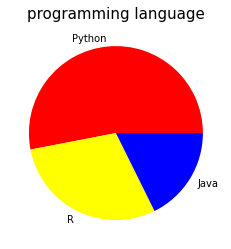

In [ ]:
programs = ['Python', 'R', 'Java']
use = [96, 53, 32]
plt.pie(use, labels = programs, colors=['red','yellow','blue'])
plt.title('programming language', fontsize=15)  #fontsize는 글자크기를 조정할 수 있는 인자입니다!
plt.show()

그래프를 보면 알 수 있다시피, 


*   pie(데이터값, labels=범주 이름, colors=각 범주별 색상)


으로 코드를 작성할 수 있습니다.


다른 매개변수들을 더 알아볼까요?




*   autopct : 표시하고자 하는 소숫점 자릿수를 설정 가능합니다.
*   shadow : 그래프에 그림자를 나타낼 수 있습니다.
*   startangle : 그래프가 시작하는 방향을 바꿀 수 있습니다.
*   texptprops : 그래프에 표시되는 글자에 관한 설정을 조정할 수 있습니다. 





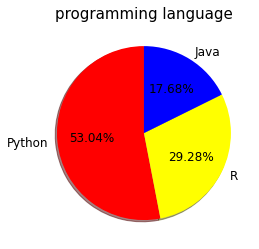

In [ ]:
plt.pie(use, labels = programs, colors=['red','yellow','blue'], autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize':12})
#autopct='%1.2f%%' : 소숫점 둘째자리까지 표현
#startangle=90 : 왼쪽부터 그래프 시작
#textprops={'fontsize':12} : 딕셔너리로 구체적인 설정를 조정할 수 있습니다!
plt.title('programming language', fontsize=15) 
plt.show()

# 2. Bar plot(막대 그래프)

막대그래프도 원그래프와 같이 범주형 데이터를 대상으로 합니다.


bar()과 barh()를 이용하여 막대 그래프를 그릴 수 있습니다. 


주요 매개변수로는 color, alpha, width 등이 있습니다.




*   color : 막대 색 
*   alpha : 투명도 (0에 가까울수록 투명함을 나타냅니다)
*   width : 막대의 넓이


그래프를 그릴 데이터로 seaborn 라이브러리의 내장 데이터를 이용하겠습니다!

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')

데이터가 어떤 형태인지 짧게 봐볼까요?

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


tips 데이터의 day 는 범주형열인데요.

day의 범주별로, tip 값을 더한 합을 구하였습니다. 이를 기반으로 bar plot을 그려봅시다!


In [ ]:
day_sum = tips.groupby('day').tip.sum()

day_sum

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

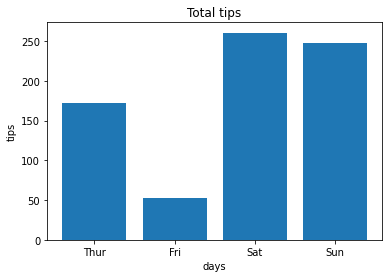

In [ ]:
plt.bar(['Thur', 'Fri', 'Sat', 'Sun'], day_sum)
plt.title('Total tips', fontsize=12)
plt.xlabel('days')
plt.ylabel('tips')
plt.show()

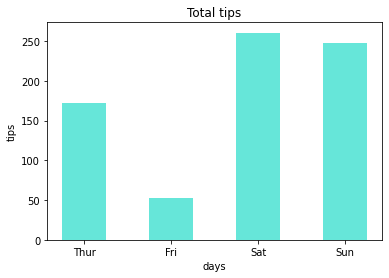

In [ ]:
plt.bar(['Thur', 'Fri', 'Sat', 'Sun'], day_sum, color='turquoise', alpha=0.8, width=0.5)
plt.title('Total tips', fontsize=12)
plt.xlabel('days')
plt.ylabel('tips')
plt.show()

저는 turquoise 색을 사용하였는데요, google에 matplotlib color 를 검색하면, 다양한 색상의 이름이 나오니 참고하시면 좋을 것 같아요.

barh()는 가로방향의 막대 그래프를 그리는 코드입니다.
bar()과 사용법은 동일하지만, x축 데이터의 값이 y축에 표현되기 때문에, 축과 관련된 설정을 할 때 조심해야 해요!

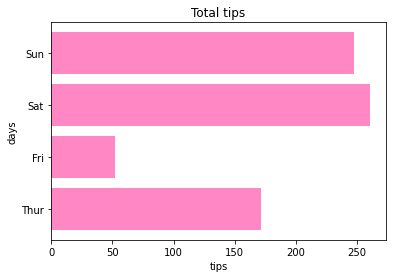

In [ ]:
plt.barh(['Thur', 'Fri', 'Sat', 'Sun'], day_sum, color='hotpink', alpha=0.8)
plt.title('Total tips', fontsize=12)
plt.ylabel('days')
plt.xlabel('tips')
plt.show()

이번에는 time에 따라, 요일별로 tip이 어떻게 달라지는지 병렬적으로 나열된 막대그래프를 그려봅시다.

In [ ]:
tips.groupby('time').tip.sum()

time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64

런치타임과 디너타임이 있는 것을 확인할 수 있습니다.

In [10]:
lunch_tips = tips[tips['time']=='Lunch'].groupby('day').tip.sum()
dinner_tips = tips[tips['time']=='Dinner'].groupby('day').tip.sum()

print(lunch_tips)
print(dinner_tips)

day
Thur    168.83
Fri      16.68
Sat       0.00
Sun       0.00
Name: tip, dtype: float64
day
Thur      3.00
Fri      35.28
Sat     260.40
Sun     247.39
Name: tip, dtype: float64


막대 그래프 두 개를 나란히 그리기 위해서는, 한 그래프의 x값을 옮겨준다고 생각합시다.

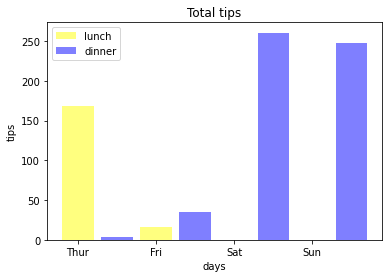

In [ ]:
x=np.arange(4)
plt.bar(x, lunch_tips, color='yellow', alpha=0.5, width=0.4, label='lunch')
plt.bar(x+0.5, dinner_tips, color='blue', alpha=0.5, width=0.4, label='dinner') #0.5만큼 가로축 값에 더해줌으로써 그래프를 오른쪽으로 이동했다고 생각하면 됩니다!
plt.title('Total tips', fontsize=12)
plt.xticks(x, labels=['Thur', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.xlabel('days')
plt.ylabel('tips')
plt.show()

# 3. Histogram(히스토그램)


히스토그램은 numeric data의 분포를 나타낼 수 있습니다.

보통 확률이나 도수의 분포를 그릴 때 사용하고, hist() 함수를 사용합니다.

주요 매개변수로는 bins, density, color 등이 있습니다.



*   bins : 막대의 개수
*   density : 확률 밀도로 표현할 것인지
*   color : 그래프 색상
*   alpha : 투명도





먼저 간단하게 표준 정규 분포의 그래프를 그려보겠습니다.

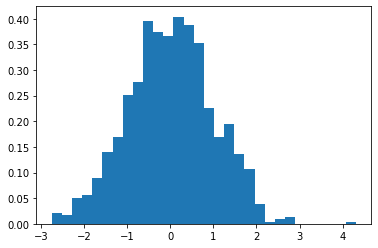

In [ ]:
data = np.random.randn(1000)
plt.hist(data, bins=30, density=True)
plt.show()

잘 그려진 것을 확인할 수 있습니다!

다음으로는 두 개의 그래프를 중첩해서 그려볼까요?

평균과 분산이 다른 정규분포그래프 두개를 그려보겠습니다.

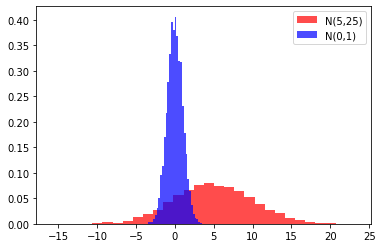

In [ ]:
x = np.random.normal(5, 5, 5000)
y = np.random.normal(0, 1, 5000)

plt.hist(x, bins=30, density=True, color='red', alpha=0.7, label='N(5,25)')
plt.hist(y, bins=30, density=True, color='blue', alpha=0.7, label='N(0,1)')
plt.legend()
plt.show()

이렇게 두 그래프를 나타내는 코드를 연달아서 작성하고 출력해주면, 중첩해서 출력이 되는 것을 볼 수 있습니다.

# 4. Scatter plot(산점도)

산점도는 보통 두 변수 사이의 관계를 확인하고자 할 때 사용합니다.

scatter() 함수를 사용하고, 주요 매개변수로는 marker, c, s 등이 있습니다.



*   marker : 점 
*   c : 점 색깔
*   s : 점 크기
*   alpha : 투명도

산점도는 color 가 아닌, c로 색을 설정한다는 점! 다른 그래프들과 다르네요.

산점도는 seaborn의 다른 내장 데이터인 iris data  set을 이용해서 나타내겠습니다.

iris datas set은 붓꽃의 종류별로 꽃받침(sepal)과 꽃잎(petal)의 넓이와 길이를 나타낸 data set 입니다. 


In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


꽃의 종류와 개체별로 꽃받침과 꽃잎의 길이와 넓이가 상이한 것을 볼 수 있습니다. 그렇다면 이 변수들은 어떠한 관계가 있는지 산점도를 그려 나타내볼까요?


먼저, 꽃잎의 길이와 넓이가 어떠한 관계가 있는지 봅시다.

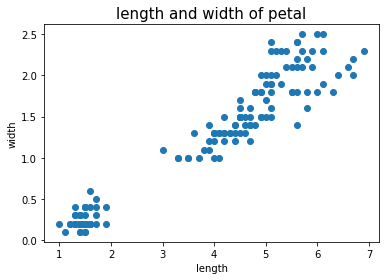

In [21]:
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title('length and width of petal',  fontsize=15)
plt.xlabel('length')
plt.ylabel('width')
plt.show()

꽃잎의 넓이와 길이는 비례하는 것을 볼 수 있네요.

앞서 언급했던 매개변수를 조정하여봅시다.

점 크기는 200, 색은 황금색으로 설정해주었고 투명도를 조정해보았습니다.


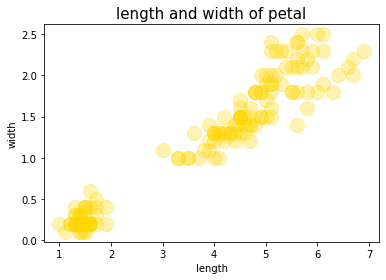

In [20]:
plt.scatter(iris['petal_length'], iris['petal_width'], s=200, c='gold', alpha=0.3)
plt.title('length and width of petal', fontsize=15)
plt.xlabel('length')
plt.ylabel('width')
plt.show()

점의 크기와 색을 다른 변수 값에 따라서 조정할 수도 있는데요. 

이번엔 꽃받침의 길이와 넓이 사이의 관계를 알아보겠습니다.
꽃잎의 넓이는 점의 크기와 비례하도록, 꽃잎의 길이는 점의 색깔 변화에 나타나도록 그래프를 그려보겠습니다.

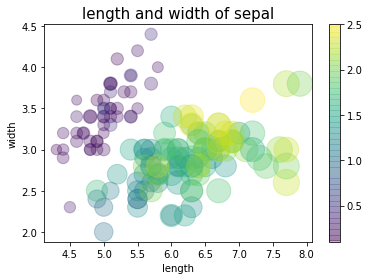

In [22]:
plt.scatter(iris['sepal_length'], iris['sepal_width'], s=iris['petal_length']*100, c=iris['petal_width'], alpha=0.3)
plt.title('length and width of sepal', fontsize=15)
plt.xlabel('length')
plt.ylabel('width')
plt.colorbar()  #이 코드를 추가하면 color bar 가 생성되어 점의 색깔이 어떤 값을 의미하는지 알 수 있습니다.
plt.show()

이렇게 pie chart, bar plot, histogram, scatter plot을 그려보았습니다!

각각의 그래프가 가지는 특성, 매개변수를 공부하고 목적에 맞게 사용하면 좋을 것 같아요. 

다음 포스팅은 추가적인 그래프를 더 그려보고 subplot 추가하는 방법을 소개한 후에 Matplotlib를 마무리하도록 하겠습니다.

읽어주셔서 감사합니다! 
